In [86]:
import pandas as pd
import numpy as np
import os
from matplotlib import pyplot as plt
import matplotlib

import networkx as nx

In [2]:
income_path = os.path.join("data", "income.csv")
with open(income_path) as f:
    income = pd.read_csv(f)
income.columns = ["Year", "Municipality", "mean", "median"]
income.head(11)

,Year,Municipality,mean,median
0,1995,WHOLE COUNTRY,18206,16600
1,1995,Espoo,22526,20116
2,1995,Helsinki,20245,17927
3,1995,Hyvinkää,18620,17221
4,1995,Järvenpää,19791,18538
5,1995,Karkkila,17026,15770
6,1995,Kauniainen,30068,24817
7,1995,Kerava,19954,18855
8,1995,Kirkkonummi,21237,19541
9,1995,Lohja,18570,17177


In [3]:
cities = income["Municipality"].unique()
# cities
income.sort_values(by=["Year", "median"], ascending=[False, False]).head(10)

,Year,Municipality,mean,median
7781,2020,Kauniainen,55777,38084
8075,2020,Jomala,34621,32165
8076,2020,Lemland,33991,31300
7788,2020,Sipoo,34177,29915
7776,2020,Espoo,35649,29881
8080,2020,Brändö,36640,29842
7790,2020,Tuusula,33645,29297
7783,2020,Kirkkonummi,33653,29200
8078,2020,Saltvik,30921,28984
7787,2020,Pornainen,30963,28932


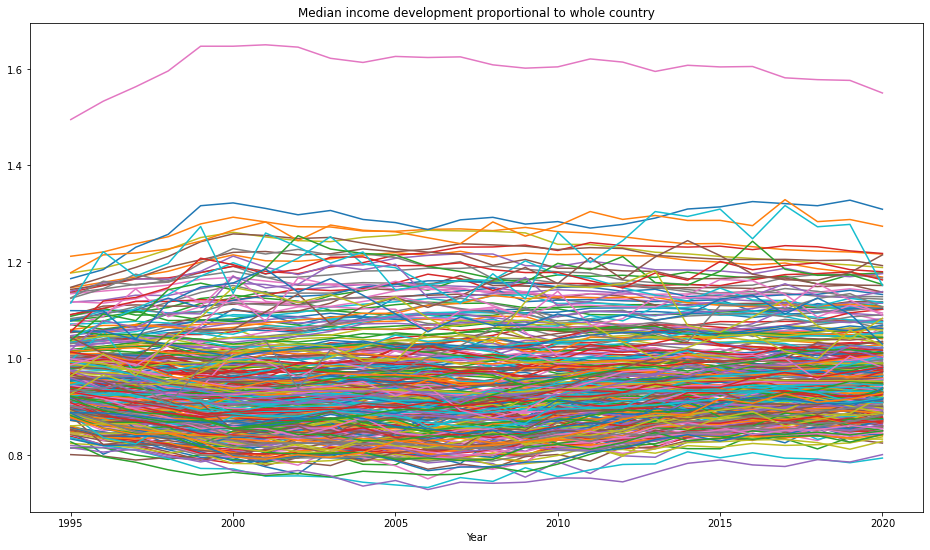

In [4]:
fig, ax = plt.subplots()
for city in cities:
    df = income[income["Municipality"] == city].copy()
    df["median %"] = (
        df["median"].values / income[income.Municipality == "WHOLE COUNTRY"]["median"].values
    )
    df.plot(x="Year", y="median %", ax=ax, legend=False, figsize=(16, 9))
ax.set_title("Median income development proportional to whole country")
plt.show()

In [5]:
diff = (
    income[income["Year"] == 2020]["median"].values
    - income[income["Year"] == 1995]["median"].values
)
diff = pd.DataFrame({"Municipality": cities, "Median income diff 1995-2020": diff})
diff.sort_values(by=["Median income diff 1995-2020"], ascending=False).head(10)

,Municipality,Median income diff 1995-2020
6,Kauniainen,13267
300,Jomala,12818
305,Brändö,12520
301,Lemland,11746
307,Kumlinge,11702
46,Kustavi,11506
303,Saltvik,11455
123,Vesilahti,11383
12,Pornainen,11172
302,Lumparland,11112


In [6]:
collection_frame = diff.set_index("Municipality").copy()
collection_frame["Median income 2020"] = income[income["Year"] == 2020]["median"].values

In [7]:
with open(os.path.join("data", "age_males_all.csv"), encoding="latin-1") as f:
    age_male = pd.read_csv(f)

with open(os.path.join("data", "age_females_all.csv")) as f:
    age_female = pd.read_csv(f)
age_male.head(20)

,Area,Age,1990,1991,1992,1993,1994,1995,1996,1997,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
0,WHOLE COUNTRY,Total,2426204,2443042,2457282,2470196,2481649,2491701,2500596,2509098,...,2652534,2666622,2680364,2691863,2701490,2712327,2719131,2723290,2728262,2733808
1,WHOLE COUNTRY,0 - 4,159773,162288,165864,166569,167011,165466,163336,159286,...,154881,155281,154901,153486,150579,147041,142459,137057,130884,126209
2,WHOLE COUNTRY,05-Sep,167076,165997,162741,161237,160466,161971,163925,167130,...,149722,151706,153815,155317,157405,157910,158343,158005,156654,153934
3,WHOLE COUNTRY,Oct-14,165979,165090,166199,168033,169194,168870,167498,164178,...,149569,148569,148863,149597,150064,152119,154230,156182,157712,160031
4,WHOLE COUNTRY,15 - 19,155219,158767,162272,166427,167527,167008,166083,167145,...,167231,163421,159903,156492,154051,153194,152215,152126,152230,152522
5,WHOLE COUNTRY,20 - 24,175039,169630,163134,156736,154838,156008,159086,162473,...,170256,173775,174276,174762,173332,171797,168014,164499,161679,159178
6,WHOLE COUNTRY,25 - 29,192527,192300,191029,187952,182487,177046,170510,163755,...,177541,175226,174367,174020,175568,178544,182223,182635,183092,181808
7,WHOLE COUNTRY,30 - 34,196001,194261,193682,195434,195346,194189,192790,191034,...,174711,177454,180608,183123,183915,184004,181676,180832,181115,183434
8,WHOLE COUNTRY,35 - 39,207180,206710,203601,200415,198272,196143,193667,192836,...,165054,169502,174775,177106,177811,178273,180761,183327,186122,187719
9,WHOLE COUNTRY,40 - 44,226073,222410,218769,213391,208403,205482,204651,201507,...,172221,166649,161204,160576,162832,166845,170871,175769,177928,178936


In [8]:
age_not_in_income = [
    city for city in age_male.Area.unique() if city not in income.Municipality.unique().tolist()
]
income_not_in_age = [
    city for city in income.Municipality.unique().tolist() if city not in age_male.Area.unique()
]
print(age_not_in_income)
print(income_not_in_age)

['Ingå', 'Kimitoön', 'Kristinestad', 'Kronoby', 'Larsmo', 'Malax', 'Mariehamn', 'Korsholm', 'Närpes', 'Pargas', 'Pedersöre', 'Jakobstad', 'Nykarleby']
['Inkoo', 'Kemiönsaari', 'Parainen', 'Honkajoki', 'Kruunupyy', 'Luoto', 'Pedersören kunta', 'Pietarsaari', 'Uusikaarlepyy', 'Kristiinankaupunki', 'Närpiö', 'Maalahti', 'Mustasaari', 'Maarianhamina - Mariehamn']


In [9]:
age_male.replace("Ingå", "Inkoo", inplace=True)
age_male.replace("Kimitoön", "Kemiönsaari", inplace=True)
age_male.replace("Kristinestad", "Kristiinankaupunki", inplace=True)
age_male.replace("Kronoby", "Kruunupyy", inplace=True)
age_male.replace("Larsmo", "Luoto", inplace=True)
age_male.replace("Malax", "Maalahti", inplace=True)
age_male.replace("Mariehamn", "Maarianhamina - Mariehamn", inplace=True)
age_male.replace("Korsholm", "Mustasaari", inplace=True)
age_male.replace("Närpes", "Närpiö", inplace=True)
age_male.replace("Pargas", "Parainen", inplace=True)
age_male.replace("Pedersöre", "Pedersören kunta", inplace=True)
age_male.replace("Jakobstad", "Pietarsaari", inplace=True)
age_male.replace("Nykarleby", "Uusikaarlepyy", inplace=True)

age_female.replace("Ingå", "Inkoo", inplace=True)
age_female.replace("Kimitoön", "Kemiönsaari", inplace=True)
age_female.replace("Kristinestad", "Kristiinankaupunki", inplace=True)
age_female.replace("Kronoby", "Kruunupyy", inplace=True)
age_female.replace("Larsmo", "Luoto", inplace=True)
age_female.replace("Malax", "Maalahti", inplace=True)
age_female.replace("Mariehamn", "Maarianhamina - Mariehamn", inplace=True)
age_female.replace("Korsholm", "Mustasaari", inplace=True)
age_female.replace("Närpes", "Närpiö", inplace=True)
age_female.replace("Pargas", "Parainen", inplace=True)
age_female.replace("Pedersöre", "Pedersören kunta", inplace=True)
age_female.replace("Jakobstad", "Pietarsaari", inplace=True)
age_female.replace("Nykarleby", "Uusikaarlepyy", inplace=True)

income = income[income["Municipality"] != "Honkajoki"]
collection_frame = collection_frame.drop("Honkajoki")

In [10]:
age_not_in_income = [
    city for city in age_male.Area.unique() if city not in income.Municipality.unique().tolist()
]
income_not_in_age = [
    city for city in income.Municipality.unique().tolist() if city not in age_male.Area.unique()
]
print(age_not_in_income)
print(income_not_in_age)

[]
[]


In [11]:
age_comb = age_male.copy()
a = age_male.iloc[:, 2:].copy()
b = age_female.iloc[:, 2:].copy()
age_comb.iloc[:, 2:] = a + b
city_datas = []
year_range = [i for i in range(1990, 2021)]
cities = income["Municipality"].unique()
for city in cities:
    city_data = age_comb[age_comb["Area"] == city].copy()
    total = city_data[city_data["Age"] == "Total"].iloc[:, 2:].values
    youth = (city_data.iloc[1:7].sum(0).values[2:] / total).flatten()
    middle_aged = (city_data.iloc[7:13].sum(0).values[2:] / total).flatten()
    elderly = (city_data.iloc[13:17].sum(0).values[2:] / total).flatten()

    df = pd.DataFrame(
        {
            "Kunta": city,
            "Vuosi": year_range,
            "mean age": np.mean(total),
            "median age": np.median(total),
            "0-30y percentage": youth,
            "30-60y percentage": middle_aged,
            "60y+ percentage": elderly,
        }
    )
    city_datas.append(df)

city_datas[0]

,Kunta,Vuosi,mean age,median age,0-30y percentage,30-60y percentage,60y+ percentage
0,WHOLE COUNTRY,1990,5.282031e+06,5255580.0,0.397724,0.416696,0.185579
1,WHOLE COUNTRY,1991,5.282031e+06,5255580.0,0.394619,0.418604,0.186777
2,WHOLE COUNTRY,1992,5.282031e+06,5255580.0,0.391499,0.420881,0.187619
3,WHOLE COUNTRY,1993,5.282031e+06,5255580.0,0.388193,0.424082,0.187725
4,WHOLE COUNTRY,1994,5.282031e+06,5255580.0,0.384617,0.426513,0.18887
5,WHOLE COUNTRY,1995,5.282031e+06,5255580.0,0.381305,0.428466,0.190229
6,WHOLE COUNTRY,1996,5.282031e+06,5255580.0,0.377823,0.430614,0.191562
7,WHOLE COUNTRY,1997,5.282031e+06,5255580.0,0.374361,0.432273,0.193366
8,WHOLE COUNTRY,1998,5.282031e+06,5255580.0,0.371107,0.433095,0.195797
9,WHOLE COUNTRY,1999,5.282031e+06,5255580.0,0.368905,0.432617,0.198477


In [12]:
first_years = pd.concat([data.iloc[0] for data in city_datas], 1).T.set_index("Kunta")
last_years = pd.concat([data.iloc[-1] for data in city_datas], 1).T.set_index("Kunta")
# last_years
# first_years
diff_years = last_years.copy()
diff_years.iloc[:, 1:] -= first_years
diff_years

C:\Users\35850\AppData\Local\Temp\ipykernel_3640\2206406357.py:1: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  first_years = pd.concat([data.iloc[0] for data in city_datas], 1).T.set_index("Kunta")
C:\Users\35850\AppData\Local\Temp\ipykernel_3640\2206406357.py:2: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  last_years = pd.concat([data.iloc[-1] for data in city_datas], 1).T.set_index("Kunta")


,Vuosi,mean age,median age,0-30y percentage,30-60y percentage,60y+ percentage
Kunta,,,,,,
WHOLE COUNTRY,2020,0.0,0.0,-0.068747,-0.03719,0.105936
Espoo,2020,0.0,0.0,-0.058424,-0.03239,0.090813
Helsinki,2020,0.0,0.0,-0.0283,-0.007868,0.036169
Hyvinkää,2020,0.0,0.0,-0.09031,-0.038946,0.129256
Järvenpää,2020,0.0,0.0,-0.102352,-0.043139,0.145491
...,...,...,...,...,...,...
Föglö,2020,0.0,0.0,-0.045866,-0.028185,0.07405
Kumlinge,2020,0.0,0.0,-0.143365,-0.021547,0.164912
Kökar,2020,0.0,0.0,-0.120946,0.015405,0.105541


In [13]:
# collection_frame = pd.concat([collection_frame, diff_years.iloc[:,1:]])
collection_frame["0-30y"] = last_years["0-30y percentage"]
collection_frame["30-60y"] = last_years["30-60y percentage"]
collection_frame["60y+"] = last_years["60y+ percentage"]
collection_frame["diff 0-30y 1990-2020"] = diff_years["0-30y percentage"]
collection_frame["diff 30-60y 1990-2020"] = diff_years["30-60y percentage"]
collection_frame["diff 60y+ 1990-2020"] = diff_years["60y+ percentage"]

In [14]:
age_percentages = age_male.groupby("Area").sum() / (
    age_male.groupby("Area").sum() + age_female.groupby("Area").sum()
)
age_percentages = age_percentages.round(3) * 100

In [15]:
age_percentages

,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
Area,,,,,,,,,,,,,,,,,,,,,
Akaa,48.9,48.8,48.8,48.9,48.9,48.9,49.0,49.1,49.2,49.2,...,49.5,49.5,49.7,49.7,49.8,49.9,50.0,50.2,50.2,50.3
Alajärvi,49.5,49.6,49.4,49.5,49.6,49.6,49.4,49.5,49.5,49.7,...,50.1,50.2,50.4,50.2,50.3,50.4,50.3,50.6,50.7,50.6
Alavieska,50.5,50.1,50.0,49.9,50.1,49.9,50.1,50.2,50.3,50.2,...,51.4,51.9,51.7,52.1,52.2,52.1,52.5,52.5,52.8,52.8
Alavus,49.6,49.6,49.6,49.6,49.7,49.8,49.7,49.7,49.8,49.9,...,50.1,50.1,50.2,50.4,50.4,50.4,50.4,50.4,50.7,50.8
Asikkala,49.3,49.5,49.4,49.5,49.4,49.5,49.7,49.5,49.6,49.6,...,49.6,49.6,49.6,49.6,49.8,49.9,49.8,50.0,49.8,49.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Ylivieska,49.3,49.4,49.4,49.4,49.5,49.5,49.5,49.6,49.8,50.0,...,49.9,49.9,50.1,50.1,50.2,50.0,50.0,50.1,50.1,50.0
Ylöjärvi,49.9,49.9,49.9,49.9,50.0,50.0,49.9,49.9,49.9,49.9,...,50.1,50.1,50.2,50.1,50.1,49.9,50.0,50.1,50.2,50.3
Ypäjä,50.6,50.5,50.8,50.8,50.6,51.2,51.2,51.5,52.1,51.6,...,49.6,49.8,50.0,50.0,50.4,50.4,50.5,50.4,50.5,50.6


In [16]:
collection_frame["Percentage of males 2020"] = age_percentages["2020"]
collection_frame["Diff in percentage of males from 1990 to 2020"] = (
    age_percentages["2020"] - age_percentages["1990"]
)

In [17]:
with open(os.path.join("data", "demographics.csv"), "w+") as f:
    collection_frame.to_csv(f)

In [18]:
collection_frame

,Median income diff 1995-2020,Median income 2020,0-30y,30-60y,60y+,diff 0-30y 1990-2020,diff 30-60y 1990-2020,diff 60y+ 1990-2020,Percentage of males 2020,Diff in percentage of males from 1990 to 2020
Municipality,,,,,,,,,,
WHOLE COUNTRY,7969,24569,0.328977,0.379507,0.291516,-0.068747,-0.03719,0.105936,49.4,0.9
Espoo,9765,29881,0.376173,0.42393,0.199897,-0.058424,-0.03239,0.090813,49.8,1.4
Helsinki,9286,27213,0.344208,0.428255,0.227538,-0.0283,-0.007868,0.036169,47.5,2.3
Hyvinkää,8634,25855,0.315721,0.390222,0.294057,-0.09031,-0.038946,0.129256,48.9,0.4
Järvenpää,8539,27077,0.349702,0.398605,0.251693,-0.102352,-0.043139,0.145491,48.7,0.2
...,...,...,...,...,...,...,...,...,...,...
Föglö,10397,26777,0.277567,0.336502,0.385932,-0.045866,-0.028185,0.07405,52.1,0.9
Kumlinge,11702,27183,0.185668,0.32899,0.485342,-0.143365,-0.021547,0.164912,53.1,1.3
Kökar,10617,26617,0.2,0.36,0.44,-0.120946,0.015405,0.105541,55.1,-1.3


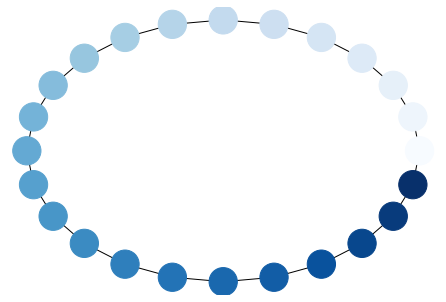

In [20]:
G = nx.cycle_graph(24)
pos = nx.circular_layout(G)
nx.draw(G, pos, node_color=range(24), node_size=800, cmap=plt.cm.Blues)
plt.show()

In [87]:
MOBILITY_BY_YEAR_PATH = os.path.join("data", "mobility_by_year")


def data_to_network(year, directed, edge_attr, percent, viz_bc):
    """
    Reads data to dataframe format.
    - Removes all the edges with total migration of zero.
    - Adds a column called 'log', which haves natural logarithm values of column 'Total'.
    - Changes column names to more suitable ones.

    """

    N = 0

    data = pd.read_csv(
        os.path.join(MOBILITY_BY_YEAR_PATH, year) + ".csv",
        delimiter=",",
        encoding="UTF-8",
        skiprows=N,
    )

    data = data.rename(
        columns={
            "Area of arrival": "Arrival",
            "Area of departure": "Departure",
            "Total " + year + " Intermunicipal migration": "Total",
            "Males " + year + " Intermunicipal migration": "Males",
            "Females " + year + " Intermunicipal migration": "Females",
        }
    )

    data = data.drop(data[data.Total == 0].index)  # Remove links with weight zero

    data = data.replace({"Arrival - ": "", "Departure - ": ""}, regex=True)

    data["log"] = np.log(data["Total"])
    data["netto"] = 0

    if viz_bc:
        data["Total"] = (
            1 / data["Total"]
        )  # take reciprocals for betweenness centrality, UNCOMMENT IF BC NOT NEEDED

    df_sorted = data.sort_values(by=[edge_attr], ascending=False)
    df_sorted = df_sorted.reset_index()

    percent = percent
    amount = len(df_sorted) * percent
    amount = round(amount, 0)

    del df_sorted["index"]
    df_strongest = df_sorted.iloc[0 : int(amount), :]

    if directed:
        network = nx.from_pandas_edgelist(
            df_strongest,
            source="Departure",
            target="Arrival",
            edge_attr=edge_attr,
            create_using=nx.DiGraph(),
        )

    else:
        network = nx.from_pandas_edgelist(
            df_strongest, source="Departure", target="Arrival", edge_attr=edge_attr
        )

    return network, data

In [90]:
def visualize_network(
    network, year, directed, viz_bc, df, edge_attr, netto, percent, frame=None, mode=None
):
    fig = plt.figure(1)
    cmap = plt.get_cmap("Blues")
    vmin = -0.01
    vmax = 0.1

    edges = network.edges()

    if netto:
        weights = [network[u][v]["netto"] for u, v in edges]
        weights2 = [w * 0.002 for w in weights]
    else:
        weights = [network[u][v][edge_attr] for u, v in edges]

        if edge_attr == "Total":
            weights2 = [w * 0.001 for w in weights]
        elif edge_attr == "log":
            weights2 = [w * 0.1 for w in weights]

    if viz_bc:
        network_all = nx.from_pandas_edgelist(
            df, source="Departure", target="Arrival", edge_attr="log", create_using=nx.DiGraph()
        )

        betweenness1 = nx.betweenness_centrality(network_all, weight="Total")

        nodes = network.nodes()
        betweenness = []

        for node in nodes:
            bc = [value for (key, value) in betweenness1.items() if key == node]
            betweenness.append(bc[0])

        if frame is not None:
            if mode is None:
                mode = "Median income 2020"

            colors = frame.loc[list(network.nodes)][mode].values
            nx.draw_kamada_kawai(
                network,
                arrows=True,
                arrowstyle="->",
                arrowsize=25,
                node_size=100,
                with_labels=False,
                width=weights2,
                node_color=colors,
                vmin=vmin,
                vmax=vmax,
                cmap=cmap,
            )
        elif directed:
            nx.draw_kamada_kawai(
                network,
                arrows=True,
                arrowstyle="->",
                arrowsize=25,
                node_size=100,
                with_labels=True,
                width=weights2,
                node_color=betweenness,
                vmin=vmin,
                vmax=vmax,
                cmap=cmap,
            )
        else:
            nx.draw(
                network,
                arrows=True,
                arrowstyle="->",
                arrowsize=20,
                node_size=100,
                with_labels=True,
                width=weights2,
                node_color=betweenness,
                vmin=vmin,
                vmax=vmax,
                cmap=cmap,
            )

        fig.suptitle(year + "   " + edge_attr + "   " + str(percent) + "%")
        norm = matplotlib.colors.Normalize(vmin=0.0, vmax=vmax)
        scm = matplotlib.cm.ScalarMappable(norm=norm, cmap=cmap)
        plt.colorbar(scm, shrink=0.7, aspect=20 * 0.7)

    else:
        if directed:
            nx.draw_kamada_kawai(
                network,
                arrows=True,
                arrowstyle="->",
                arrowsize=25,
                node_size=100,
                with_labels=True,
                width=weights2,
            )
        else:
            nx.draw(
                network,
                arrows=True,
                arrowstyle="->",
                arrowsize=20,
                node_size=100,
                with_labels=True,
                width=weights2,
            )

        fig.suptitle(year + "   " + edge_attr + "   " + str(percent) + "%")

    plt.show()

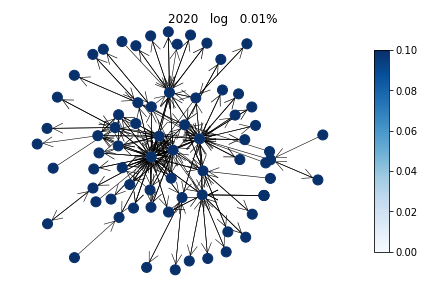

In [93]:
"""DEFINE THESE PARAMETERS TO MAKE DIFFERENT NETWORKS"""

year = "2020"  # Select the year to visualize
directed = True  # Select if the network is directed or not
edge_attr = "log"  # Select if using 'Total' or 'log' which is logarithm of Total values
viz_bc = (
    True  # Select if you want to visualize node colors based on their betweenness centralities
)
"""JOS viz_bc True, edge_attr = 'log', muuten ei toimi ! """

percent = 0.01  # How many percent of the links are evaluated
max_st = False  # Maximum spanning tree
""" Maximum spanning tree can only be used with undirected networks!!"""

netto = False  # Use net migration as edge weights
""" JOS netto = true, edge_attr='Total' !!"""

network, df = data_to_network(year, directed, edge_attr, percent, viz_bc)

if max_st:
    network = nx.algorithms.tree.mst.maximum_spanning_tree(network, weight=edge_attr)

# if netto:
# network = netto_network(network, df, percent)


visualize_network(network, year, directed, viz_bc, df, edge_attr, netto, percent, collection_frame)